*** Mean + Standard Deviation ***
1. Take the mean of the data points
2. Add/substract a desired number of standard deviation from the mean, and find any data falling outside of this range to consider as a outlier

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
# Create a sample data
# rng=np.random.RandomState(42)

x_len=20
const=np.full((1,x_len),10)
noise=np.random.randint(1,3,x_len)
data=const+noise


In [19]:
# Calculate mean and standard deviation
avg=np.mean(data)
std=np.std(data)
alpha=3
upper=avg+(alpha*std)
lower=avg-(alpha*std)

print(upper)
print(lower)

12.674772708486753
9.925227291513249


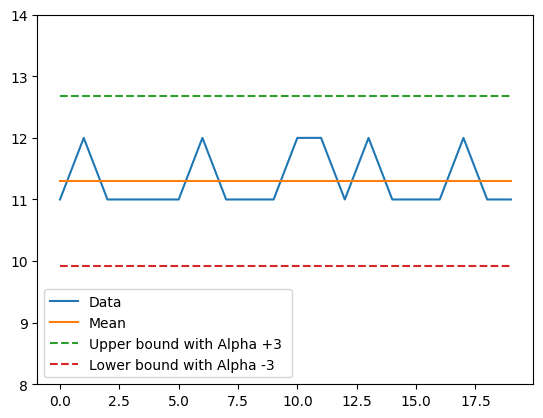

In [20]:
# Plot the data
plt.plot(range(0,x_len), data.tolist()[0], label="Data")
plt.plot(range(0,x_len),[avg]*x_len, label="Mean")
plt.plot(range(0,x_len),[upper]*x_len, label="Upper bound with Alpha +3 ", linestyle='--')
plt.plot(range(0,x_len),[lower]*x_len, label="Lower bound with Alpha -3 ", linestyle='--')
plt.ylim(8,14)
plt.legend()
plt.show()

In [21]:
# Create a sample data with huge outlier
x_len=21
const=np.full((1,x_len-1),10)
noise=np.random.randint(1,3,x_len-1)
data=const+noise

In [24]:
# Calculate the mean and std
avg=np.mean(data)
std=np.std(data)
alpha=3
upper=avg+(alpha*std)
lower=avg-(alpha*std)

print(lower)
print(upper)

10.05751884434007
13.042481155659932


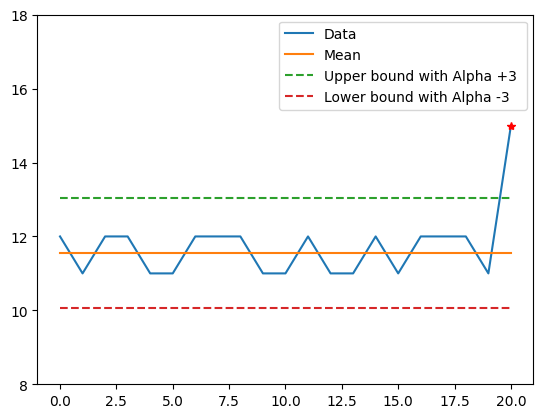

In [ ]:
# Plot the data
data_list=data.tolist()[0]
new_data=15
data_list.append(new_data)
plt.plot(range(0,x_len), data_list, label="Data")
plt.plot(range(0,x_len),[avg]*x_len, label="Mean")
plt.plot(range(0,x_len),[upper]*x_len, label="Upper bound with Alpha +3 ", linestyle='--')
plt.plot(range(0,x_len),[lower]*x_len, label="Lower bound with Alpha -3 ", linestyle='--')
plt.ylim(8,18)
# Check if new data point falls inside thresholds
# flag with red star if new data is outside threshold
if new_data>upper:
    plt.plot(20,new_data,marker="*", color="red")
elif new_data<lower:
    plt.plot(20,new_data,marker="*", color="red")
else:#
    plt.plot(20,new_data)
plt.legend()    
plt.show()

# As we can see the red star on the graph. If condition returns True, an alert or notification can be sent to the respective interested team.

*** 2. Time Series Decomposition ***
1. If the data appears to be batch or seasonality
2. Can be formatted as a time series powerful technique


In [22]:
!pip install statsmodels

# from statsmodels.tsa.seasonal import seasonal_decompose

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifacts.i.mercedes-benz.com/artifactory/api/pypi/pypi-opensource-remote/simple



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
np.random.seed(0)
date_rng=pd.date_range(start="2025-01-01", periods=365, freq="D")
data=np.sin(np.arange(365)*2*np.pi/365)+np.random.normal(0,0.5,365)
ts=pd.Series(data,index=date_rng)
ts

2025-01-01    0.882026
2025-01-02    0.217292
2025-01-03    0.523791
2025-01-04    1.172066
2025-01-05    1.002581
                ...   
2025-12-27    0.263264
2025-12-28   -0.066917
2025-12-29    0.414305
2025-12-30    0.135561
2025-12-31   -0.025054
Freq: D, Length: 365, dtype: float64

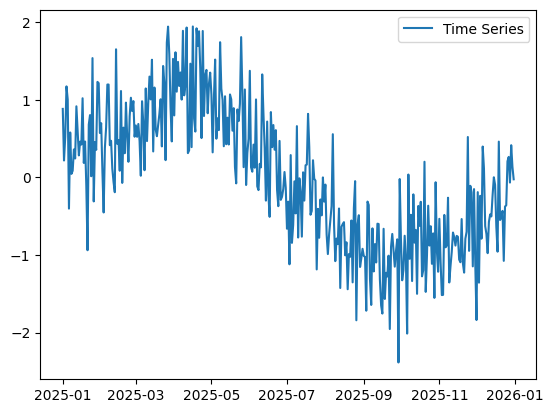

In [25]:
plt.plot(ts,label="Time Series")
plt.legend()

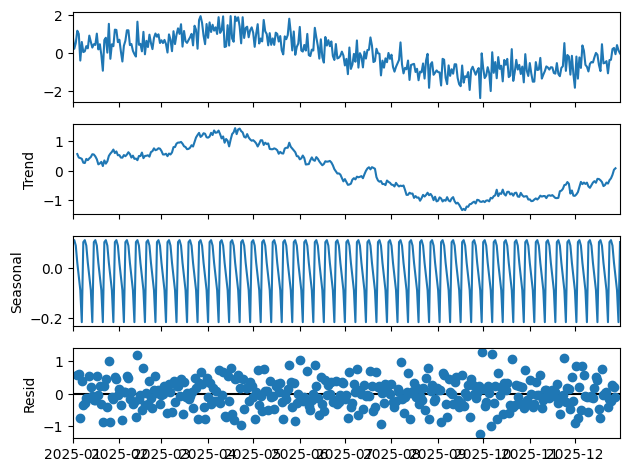

In [26]:
result_add=seasonal_decompose(ts,model='additive') # With the help of additive model the 4 data figure is plotted 
result_add.plot()
plt.show()

# The components of the plot figure
# 1. Original time series
# 2. Trend of the data  -Long term direction
# 3. Seasonality pattern found -repeating pattern
# 4. Residuals, or teh difference between the trend+seasonality and the original data  -Leftover random noise

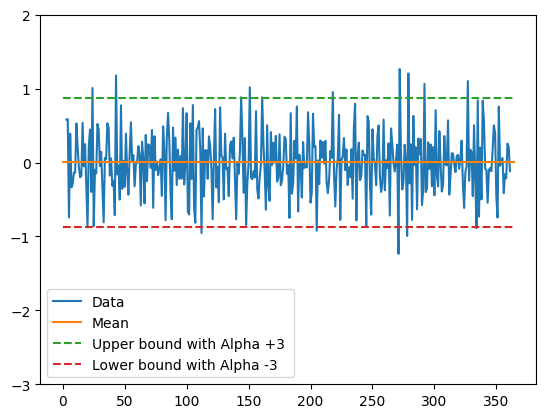

In [35]:
# Apply the Mean and Std technique on time series dataset
data=result_add.resid
data_len=len(data)
avg=np.mean(data)
std=np.std(data)
alpha=2
upper=avg+(alpha*std)
lower=avg-(alpha*std)


data_list=data.tolist()
# df=pd.DataFrame(data_list)
# display(df)
# new_data=15
# data_list.append(new_data)
plt.plot(range(0,data_len), data_list, label="Data")
plt.plot(range(0,data_len),[avg]*data_len, label="Mean")
plt.plot(range(0,data_len),[upper]*data_len, label="Upper bound with Alpha +3 ", linestyle='--')
plt.plot(range(0,data_len),[lower]*data_len, label="Lower bound with Alpha -3 ", linestyle='--')
plt.ylim(-3,2)
# Check if new data point falls inside thresholds
# flag with red star if new data is outside threshold
# if new_data>upper:
#     plt.plot(20,new_data,marker="*", color="red")
# elif new_data<lower:
#     plt.plot(20,new_data,marker="*", color="red")
# else:#
#     plt.plot(20,new_data)
plt.legend()    
plt.show()

*** Regression Residual ***
1. Using the same technique of threshold value.
2. Predict the value and cross-check against the actual data.
3. if the difference between the model and observed data differ by more than the thresholf , then classify the data as a outlier


In [ ]:
# np.random.seed(0)

# data=np.random.normal()